In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. cuantas venues son?
2. cuantas de ellas tienen valor churn 1 y 0 (2 valores)
3. de las que tienen 2 valores, verifico que distribucion tendria si elimino o parte o completamente las venues con 0 en churn pero que en otro momento tienen 1

In [3]:
path='/content/drive/Shareddrives/Data_TFM/Dataset_Final/df_final_v2.csv'

df= pd.read_csv(path, sep="	",  low_memory=False)
df.head()

,date_day,unique_venue_id,antiguedad,reactivada,country_AT,country_BE,country_CH,country_DE,country_ES,country_FR,...,widget_payment_method_ALL_METHODS,widget_payment_method_N/A,widget_payment_method_PAY_AT_VENUE_ONLY,widget_payment_method_PREPAY_ONLY,widget_payment_method_UNKNOWN,is_widget_duration,is_purchasable_duration,is_widget_duration_bin,is_purchasable_duration_bin,churn
0,2021-06-01,11000000016,144.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Not_enabled,Not_purchasable,0.0
1,2021-07-01,11000000016,145.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Not_enabled,Not_purchasable,0.0
2,2021-08-01,11000000016,146.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Not_enabled,Not_purchasable,0.0
3,2021-09-01,11000000016,147.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Not_enabled,Not_purchasable,0.0
4,2021-10-01,11000000016,148.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Not_enabled,Not_purchasable,0.0


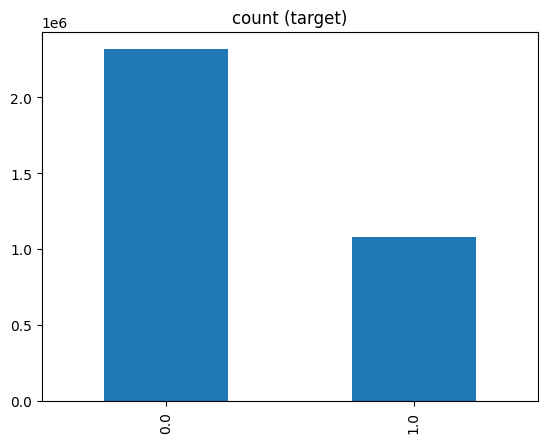

In [8]:
#df['churn'].value_counts(normalize=True)


#Class balance inspection
df["churn"].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [4]:
unique_values = df['unique_venue_id'].nunique()

print(f'existen {unique_values} venues distintas')

existen 155405 venues distintas


In [11]:
uni_ven=df.groupby(['unique_venue_id'	])['churn'].nunique().sort_values(ascending=False).reset_index()
uni_ven.reset_index().groupby('churn')['unique_venue_id'].count().reset_index().sort_values(['churn'], ascending=True)

,churn,unique_venue_id
0,1,134901
1,2,20504


In [16]:
list_unique_churn= uni_ven.loc[uni_ven['churn']==1, 'unique_venue_id'].to_list()
list_doble_churn= uni_ven.loc[uni_ven['churn']==2, 'unique_venue_id'].to_list()

de las venues que tienen 2 valores de churn, vamos a disminuir los 0

In [17]:
#obtengo la poblacion que no voy a tocar

#venues con 1 churn
pob1= df[df['unique_venue_id'].isin(list_unique_churn)]

#Venues con 2 churn, pero con churn=1

pob2= df[df['unique_venue_id'].isin(list_doble_churn) & (df['churn']==1)]


#records donde vamos a disminuir poblacion
pob3= df[df['unique_venue_id'].isin(list_doble_churn) & (df['churn']==0)]

In [20]:
print(f'df tiene len de {len(df)}')
print(f'pob1 tiene len de {len(pob1)}')
print(f'pob2 tiene len de {len(pob2)}')
print(f'pob3 tiene len de {len(pob3)}')
print(f'Si sumamos los 3 poblaciones {len(pob1)+len(pob2)+len(pob3)}')

df tiene len de 3399923
pob1 tiene len de 2930274
pob2 tiene len de 271575
pob3 tiene len de 198074
Si sumamos los 3 poblaciones 3399923


In [22]:
df['churn'].value_counts(normalize=True)

0.0    0.681351
1.0    0.318649
Name: churn, dtype: float64

In [21]:
df_concatenado = pd.concat([pob1, pob2])
df_concatenado['churn'].value_counts(normalize=True)

0.0    0.661639
1.0    0.338361
Name: churn, dtype: float64

In [23]:
df_concatenado.to_csv('/content/drive/Shareddrives/Data_TFM/Dataset_Final/df_final_v3.csv', sep="	", index=False)